# MEDICAL INSURANCE COST PREDICTION

Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

1. age: age of primary beneficiary

2. sex: insurance contractor gender, female, male

3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

4. children: Number of children covered by health insurance / Number of dependents

5. smoker: Smoking

6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

# IMPORT LIBRARIES

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

In [57]:
#Reading the dataset
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EXPLORATORY DATA  ANALYSIS

In this step we'll perform the following operations

**1. Understanding your variables**
         
         1.1) Head of the dataset
         1.2) Tail of the dataset
         1.3) Shape of the dataset
         1.4) Datatypes of all columns
         1.5) Information about the datatset
         1.6) Summary of the dataset
**2. Data cleaning**

         2.1) Check the duplicate values
         2.2) Check the NULL values

In [58]:
#Reading the first five values
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
#Reading the last five values
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [60]:
#Display randmly any number of records of dataset
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
973,19,female,40.500,0,no,southwest,1759.33800
212,24,male,28.500,2,no,northwest,3537.70300
665,43,male,38.060,2,yes,southeast,42560.43040
1301,62,male,30.875,3,yes,northwest,46718.16325
928,62,female,39.160,0,no,southeast,13470.80440
923,34,male,35.815,0,no,northwest,4320.41085
1279,25,female,26.790,2,no,northwest,4189.11310
1317,18,male,53.130,0,no,southeast,1163.46270
1111,38,male,38.390,3,yes,southeast,41949.24410
1014,38,female,27.600,0,no,southwest,5383.53600


In [61]:
#Shape of the dataset
df.shape

(1338, 7)

Number of rows = 1338

Number of columns = 7

In [62]:
#Datatype of each column
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [63]:
#Informatio about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [64]:
#Summary of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Numerical Features

In [65]:
[features for features in df.dtypes[df.dtypes != 'object'].index]

['age', 'bmi', 'children', 'charges']

In [66]:
num_features = df.dtypes[df.dtypes != 'object'].index
num_features

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [67]:
len(num_features)

4

In [68]:
df[num_features].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Categorical Features

In [69]:
cat_features = df.dtypes[df.dtypes == 'object'].index
cat_features

Index(['sex', 'smoker', 'region'], dtype='object')

In [70]:
len(cat_features)

3

In [71]:
df[cat_features].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [72]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [73]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [74]:
print(df.smoker.value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


In [75]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [76]:
print(df.region.value_counts())

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


# DATA CLEANING

In [77]:
df.shape

(1338, 7)

In [78]:
df = df.drop_duplicates()

In [79]:
df.shape

(1337, 7)

In [80]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [81]:
#Convering categorical values to numeric
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
              'smoker': {'no': 0 , 'yes' : 1},
              'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
             }
df1 = df.copy()
df1.replace(clean_data, inplace=True)

In [82]:
#Statistical Overview
df1.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


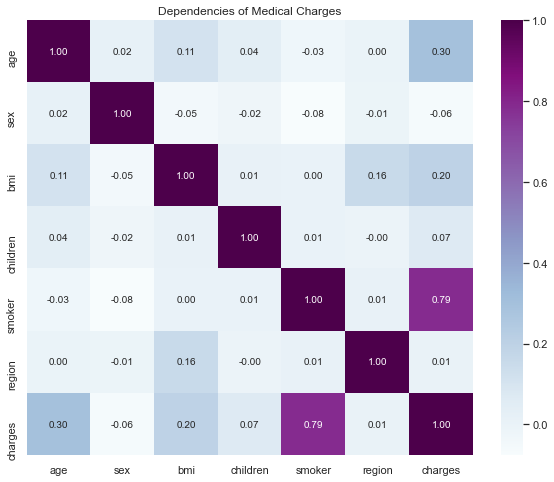

In [83]:
corr = df1.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.show()

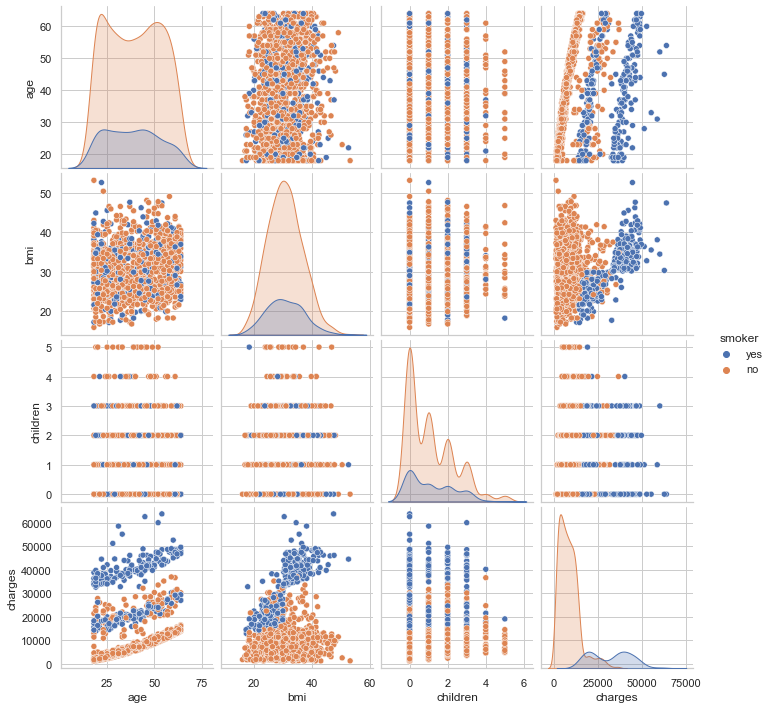

In [84]:
sns.pairplot(df,hue='smoker')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Charges')

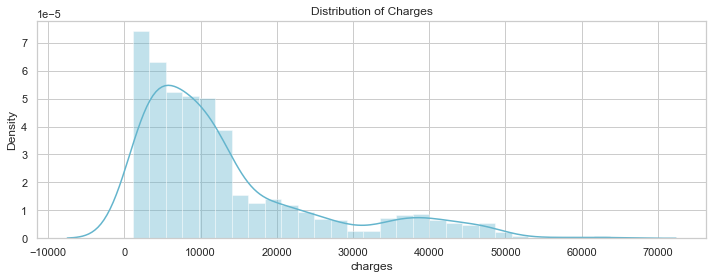

In [85]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 4))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


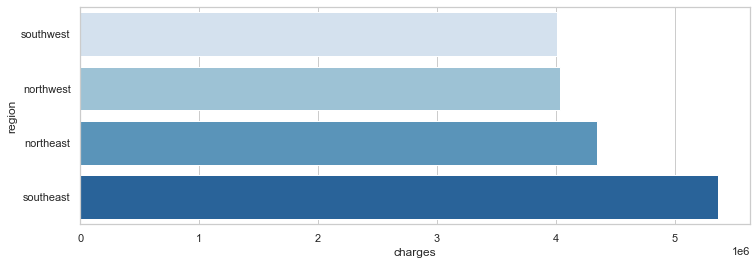

In [86]:
#Region vs charges
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(12, 4))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

<AxesSubplot:title={'center':'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

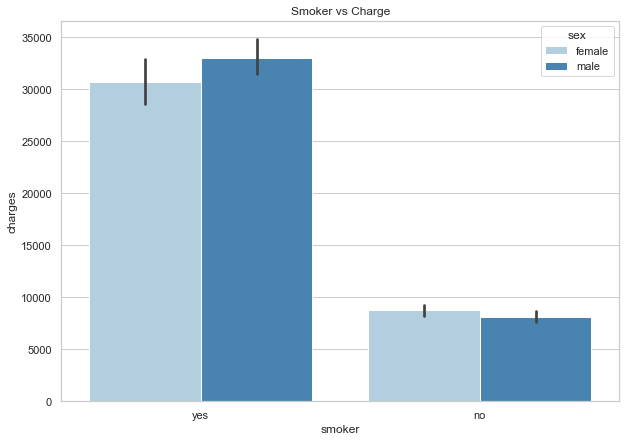

In [87]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df,palette='Blues',hue='sex')

Text(0.5, 1.0, 'BMI VS Charge')

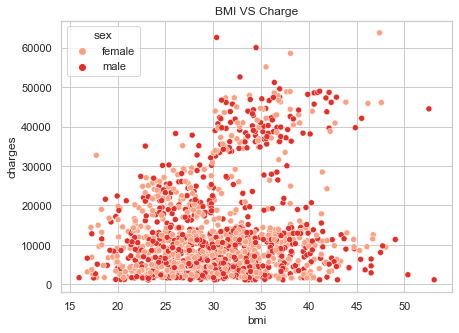

In [88]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df,palette='Reds')
plt.title('BMI VS Charge')

<AxesSubplot:title={'center':'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

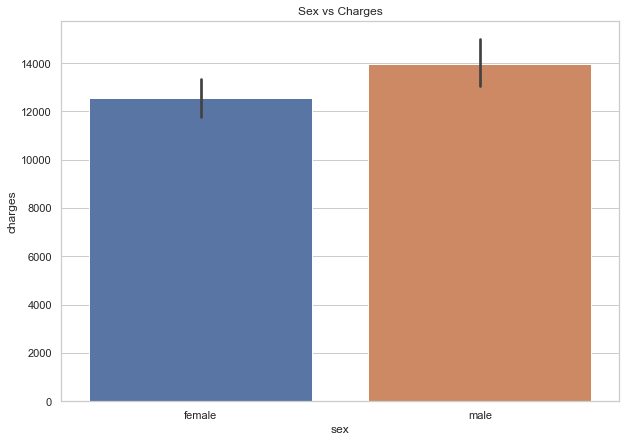

In [89]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=df)

# Feature Scaling

In [90]:
from sklearn.preprocessing import StandardScaler
pre = df1.copy()

tempBmi = pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = pre.age
tempAge = tempAge.values.reshape(-1,1)
pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
pre['charges'] = StandardScaler().fit_transform(tempCharges)

pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.440418,1,-0.453160,0,1,3,0.297857
1,-1.511647,0,0.509422,1,0,2,-0.954381
2,-0.799350,0,0.383155,3,0,2,-0.729373
3,-0.443201,0,-1.305052,0,0,0,0.719104
4,-0.514431,0,-0.292456,0,0,0,-0.777499


# Splitting data into X and Y

In [91]:
X = pre.drop('charges',axis=1).values
y = pre['charges'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

X_train_scaled = StandardScaler().fit_transform(X_train)
y_train_scaled = StandardScaler().fit_transform(y_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
y_test_scaled = StandardScaler().fit_transform(y_test)

In [92]:
print(X.shape,X_train.shape,X_test.shape)

(1337, 6) (1069, 6) (268, 6)


# Import Libraries

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
import xgboost
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

# LINEAR REGRESSION

In [95]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))
lmae=metrics.mean_absolute_error(y_test, y_pred_linear_reg_test)*100
lmse=metrics.mean_squared_error(y_test, y_pred_linear_reg_test)*100
print(linear_reg.score(X_test, y_test)*100)
print("Mean Absolute Error : ",lmae)
print("Mean Squared Error  : ",lmse)
print('RMSE                : ',rmse_linear*100)

80.61028038524823
Mean Absolute Error :  34.570059981656044
Mean Squared Error  :  24.312189704449505
RMSE                :  49.30739265510751


# SUPPORT VECTOR MACHINE REGRESSOR

In [96]:
svm = SVR()
svm.fit(X_train, y_train)

y_pred_svm_train = svm.predict(X_train)
r2_score_svm_train = r2_score(y_train, y_pred_svm_train)

y_pred_svm_test = linear_reg.predict(X_test)
r2_score_svm_test = r2_score(y_test, y_pred_svm_test)

rmse_svm = (np.sqrt(mean_squared_error(y_test, y_pred_svm_test)))
smae = metrics.mean_absolute_error(y_test, y_pred_svm_test)*100
smse = metrics.mean_squared_error(y_test, y_pred_svm_test)*100
print(svm.score(X_test, y_test)*100)
print("Mean Absolute Error    : ",smae)
print("Mean Squared Error     : ",smse)
print('RMSE                   : ',rmse_svm*100)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


85.50011124238218
Mean Absolute Error    :  34.570059981656044
Mean Squared Error     :  24.312189704449505
RMSE                   :  49.30739265510751


# RIDGE REGRESSOR

In [97]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(X_train_scaled, y_train_scaled.ravel())

y_pred_ridge_train = ridge.predict(X_train_scaled)
r2_score_ridge_train = r2_score(y_train_scaled, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(X_test_scaled)
r2_score_ridge_test = r2_score(y_test_scaled, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_ridge_test)))
rmae = metrics.mean_absolute_error(y_test_scaled, y_pred_ridge_test)*100
rmse = metrics.mean_squared_error(y_test_scaled, y_pred_ridge_test)*100
print(ridge.score(X_test, y_test)*100)
print("Mean Absolute Error : ",rmae)
print("Mean Squared Error  : ",rmse)
print('RMSE                : ',rmse_ridge*100)

52.20566121271779
Mean Absolute Error :  30.015217760715423
Mean Squared Error  :  18.098576757284814
RMSE                :  42.54242207172132


# RANDOM FOREST REGRESSOR

In [98]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train_scaled, y_train_scaled.ravel())

y_pred_random_train = rf_reg.predict(X_train_scaled)
r2_score_random_train = r2_score(y_train_scaled, y_pred_random_train)

y_pred_random_test = rf_reg.predict(X_test_scaled)
r2_score_random_test = r2_score(y_test_scaled, y_pred_random_test)

rmse_random = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_random_test)))
rfmae = metrics.mean_absolute_error(y_test_scaled, y_pred_random_test)*100
rfmse = metrics.mean_squared_error(y_test_scaled, y_pred_random_test)*100

print(rf_reg.score(X_test, y_test)*100)
print("Mean Absolute Error      : ",rfmae)
print("Mean Squared Error       : ",rfmse)
print('RMSE                     : ',rmse_random*100)

89.83050448235322
Mean Absolute Error      :  25.383891713308692
Mean Squared Error       :  12.267484831398354
RMSE                     :  35.02496942382442


# LASSO REGRESSION

In [99]:
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
#Lasso.fit(X_train, y_train)
Lasso.fit(X_train_scaled, y_train_scaled.ravel())

y_pred_lasso_train = Lasso.predict(X_train_scaled)
r2_score_lasso_train = r2_score(y_train_scaled, y_pred_lasso_train)

y_pred_lasso_test = Lasso.predict(X_test_scaled)
r2_score_lasso_test = r2_score(y_test_scaled, y_pred_lasso_test)

rmse_lasso = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_lasso_test)))

a = Lasso.score(X_test, y_test)*100
lrmae = metrics.mean_absolute_error(y_test_scaled, y_pred_lasso_test)*100
lrmse = metrics.mean_squared_error(y_test_scaled, y_pred_lasso_test)*100
print(a)
print("Mean Absolute Error  : ",lrmae)
print("Mean Squared Error   : ",lrmse)
print('RMSE                 : ',rmse_lasso*100)

36.644331874377144
Mean Absolute Error  :  41.36558196231032
Mean Squared Error   :  31.1898392498327
RMSE                 :  55.84786410403956


# XGB REGRESSOR

In [100]:
xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train_scaled.ravel())

y_pred_xgb_train = xgb.predict(X_train_scaled)
r2_score_xgb_train = r2_score(y_train_scaled, y_pred_xgb_train)

y_pred_xgb_test = xgb.predict(X_test_scaled)
r2_score_xgb_test = r2_score(y_test_scaled, y_pred_xgb_test)

rmse_xgb = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_xgb_test)))

a=xgb.score(X_test, y_test)*100
xmae = metrics.mean_absolute_error(y_test_scaled, y_pred_xgb_test)*100
xmse = metrics.mean_squared_error(y_test_scaled, y_pred_xgb_test)*100
print(a)
print("Mean Absolute Error  : ",xmae)
print("Mean Squared Error   : ",xmse)
print('RMSE                 : ',rmse_xgb*100)

85.48009126452386
Mean Absolute Error  :  27.732016673143296
Mean Squared Error   :  16.926964219853513
RMSE                 :  41.1423920304271


# COMPARATIVE ANALYSIS

In [101]:
#For mean Absolute Error
models_mae = [('Linear Regression', lmae),
          ('Support Vector Machine',smae),
          ('Ridge Regression', rmae),
          ('Random Forest Regression', rfmae),
          ('Lasso Regression', lrmae),
          ('XGB Regression',  xmae)
         ]
predict_mae = pd.DataFrame(data = models_mae, columns=['Model', 'Mean Abolute Error'])
predict_mae

,Model,Mean Abolute Error
0,Linear Regression,34.570060
1,Support Vector Machine,34.570060
2,Ridge Regression,30.015218
3,Random Forest Regression,25.383892
4,Lasso Regression,41.365582
5,XGB Regression,27.732017


In [102]:
#Mean Squared Error
models_mse = [('Linear Regression', lmse),
          ('Support Vector Machine',smse),
          ('Ridge Regression', rmse),
          ('Random Forest Regression', rfmse),
          ('Lasso Regression', lrmse),
          ('XGB Regression',  xmse)
         ]
predict_mse = pd.DataFrame(data = models_mse, columns=['Model', 'Mean Squared Error'])
predict_mse

,Model,Mean Squared Error
0,Linear Regression,24.312190
1,Support Vector Machine,24.312190
2,Ridge Regression,18.098577
3,Random Forest Regression,12.267485
4,Lasso Regression,31.189839
5,XGB Regression,16.926964


In [103]:
#RMSE
models_rmse = [('Linear Regression', rmse_linear*100),
          ('Support Vector Machine',rmse_svm*100),
          ('Ridge Regression', rmse_ridge*100),
          ('Random Forest Regression', rmse_random*100),
          ('Lasso Regression', rmse_ridge*100),
          ('XGB Regression',  rmse_xgb*100)
         ]
predict_rmse = pd.DataFrame(data = models_rmse, columns=['Model', 'RMSE'])
predict_rmse

,Model,RMSE
0,Linear Regression,49.307393
1,Support Vector Machine,49.307393
2,Ridge Regression,42.542422
3,Random Forest Regression,35.024969
4,Lasso Regression,42.542422
5,XGB Regression,41.142392


In [104]:
#R2 score
models_r2score = [('Linear Regression', r2_score_linear_reg_test*100),
          ('Support Vector Machine',r2_score_svm_test*100),
          ('Ridge Regression', r2_score_ridge_test*100),
          ('Random Forest Regression', r2_score_random_test*100),
          ('Lasso Regression', r2_score_ridge_test*100),
          ('XGB Regression',  r2_score_xgb_test*100)
         ]
predict_r2score = pd.DataFrame(data = models_r2score, columns=['Model', 'R2 score'])
predict_r2score

,Model,R2 score
0,Linear Regression,80.610280
1,Support Vector Machine,80.610280
2,Ridge Regression,81.901423
3,Random Forest Regression,87.732515
4,Lasso Regression,81.901423
5,XGB Regression,83.073036


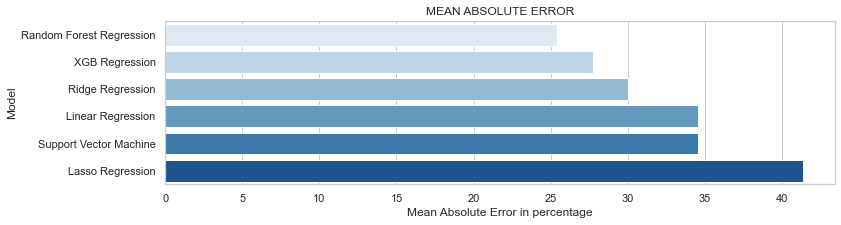

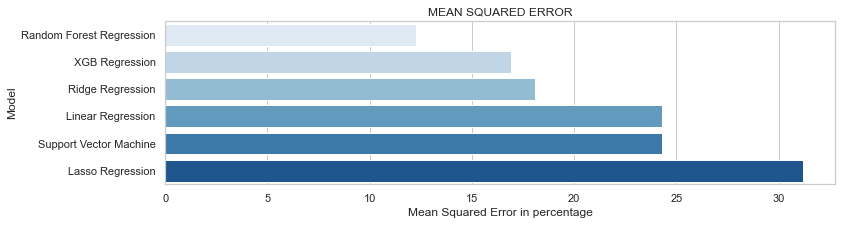

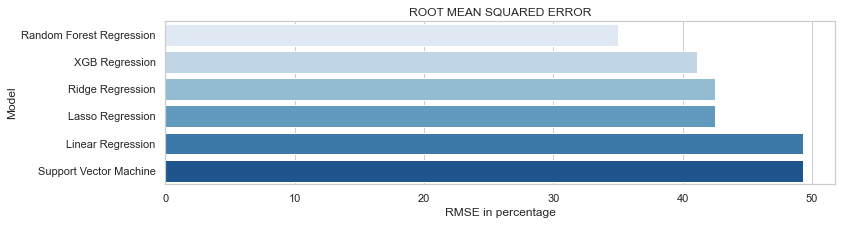

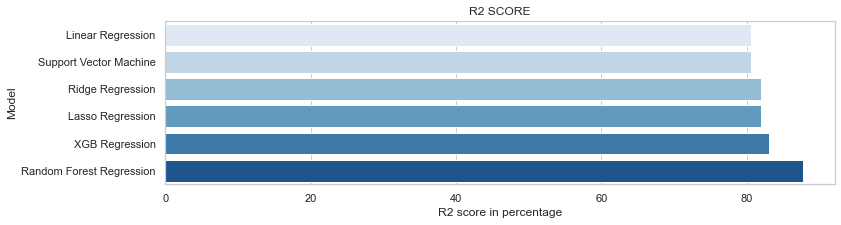

In [105]:

plt.figure(figsize=(12,3))
predict_mae.sort_values(by=['Mean Abolute Error'], inplace=True)
sns.barplot(x='Mean Abolute Error', y='Model',data = predict_mae, palette='Blues')
plt.xlabel('Mean Absolute Error in percentage')
plt.ylabel('Model')
plt.title('MEAN ABSOLUTE ERROR')
plt.show()


plt.figure(figsize=(12,3))
predict_mse.sort_values(by=['Mean Squared Error'], inplace=True)
sns.barplot(x='Mean Squared Error', y='Model',data = predict_mse, palette='Blues')
plt.xlabel('Mean Squared Error in percentage')
plt.ylabel('Model')
plt.title('MEAN SQUARED ERROR')
plt.show()


plt.figure(figsize=(12,3))
predict_rmse.sort_values(by=['RMSE'], inplace=True)
sns.barplot(x='RMSE', y='Model',data = predict_rmse, palette='Blues')
plt.xlabel('RMSE in percentage')
plt.ylabel('Model')
plt.title('ROOT MEAN SQUARED ERROR')
plt.show()

plt.figure(figsize=(12,3))
predict_r2score.sort_values(by=['R2 score'], inplace=True)
sns.barplot(x='R2 score', y='Model',data = predict_r2score, palette='Blues')
plt.xlabel('R2 score in percentage')
plt.title('R2 SCORE')
plt.ylabel('Model')
plt.show()

In [106]:
#Performance of each algorithm
models = [('Linear Regression', linear_reg.score(X_test, y_test)*100),
          ('Support Vector Machine',svm.score(X_test, y_test)*100),
          ('Ridge Regression', ridge.score(X_test, y_test)*100),
          ('Random Forest Regression', rf_reg.score(X_test, y_test)*100),
          ('Lasso Regression', a),
          ('XGB Regression', a)
         ]
predict = pd.DataFrame(data = models, columns=['Model', 'Performance'])
predict

,Model,Performance
0,Linear Regression,80.610280
1,Support Vector Machine,85.500111
2,Ridge Regression,52.205661
3,Random Forest Regression,89.830504
4,Lasso Regression,85.480091
5,XGB Regression,85.480091


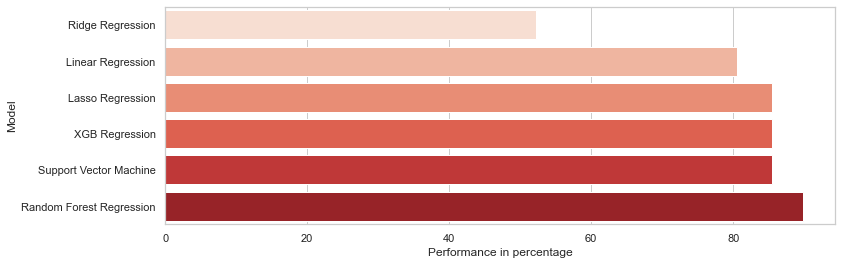

In [107]:
plt.figure(figsize=(12,4))
predict.sort_values(by=['Performance'], inplace=True)
sns.barplot(x='Performance', y='Model',data = predict, palette='Reds')
plt.xlabel('Performance in percentage')
plt.ylabel('Model')
plt.show()

# CONCLUSION

In this particular project we can see that Random Forest Regession gives us the most performance with value of 89%